In [1]:
from glob import glob
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import glob
#read all file
all_file_path=glob.glob('/kaggle/input/datverse/*.edf')
print(len(all_file_path))

28


In [3]:
print(all_file_path)

['/kaggle/input/datverse/h09.edf', '/kaggle/input/datverse/h07.edf', '/kaggle/input/datverse/s10.edf', '/kaggle/input/datverse/s08.edf', '/kaggle/input/datverse/s06.edf', '/kaggle/input/datverse/h04.edf', '/kaggle/input/datverse/h01.edf', '/kaggle/input/datverse/s01.edf', '/kaggle/input/datverse/h13.edf', '/kaggle/input/datverse/s09.edf', '/kaggle/input/datverse/s05.edf', '/kaggle/input/datverse/h10.edf', '/kaggle/input/datverse/s02.edf', '/kaggle/input/datverse/s07.edf', '/kaggle/input/datverse/s14.edf', '/kaggle/input/datverse/s13.edf', '/kaggle/input/datverse/h14.edf', '/kaggle/input/datverse/s04.edf', '/kaggle/input/datverse/h12.edf', '/kaggle/input/datverse/h05.edf', '/kaggle/input/datverse/h03.edf', '/kaggle/input/datverse/s11.edf', '/kaggle/input/datverse/h02.edf', '/kaggle/input/datverse/h08.edf', '/kaggle/input/datverse/h11.edf', '/kaggle/input/datverse/s03.edf', '/kaggle/input/datverse/h06.edf', '/kaggle/input/datverse/s12.edf']


In [4]:
all_file_path[0]

'/kaggle/input/datverse/h09.edf'

In [5]:
healthy_file_path = [i for i in all_file_path if 'h' in i.split('/')[4]]
patient_file_path = [i for i in all_file_path if 's' in i.split('/')[4]]
print(len(healthy_file_path)),print(len(patient_file_path))


14
14


(None, None)

Extracting EDF parameters from /kaggle/input/datverse/s10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 212499  =      0.000 ...   849.996 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fp2, F8, T4, T6, O2, Fp1, F7, T3, T5, O1, F4, C4, P4, F3, C3, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2003-03-11 12:08:50 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
 subject_info: 1 item (dict)
>
['Fp2', 'F8', 'T4', 'T6', 'O2', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F4', 'C4', 'P4', 'F3', 'C3', 'P3', 'Fz', 'Cz', 'Pz']
[[2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]
 [2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]
 [2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]
 ...
 [2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]
 [2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]
 [2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]]
[0.00000e+00 4.00000e-03 8.00000e-03 ... 8.49

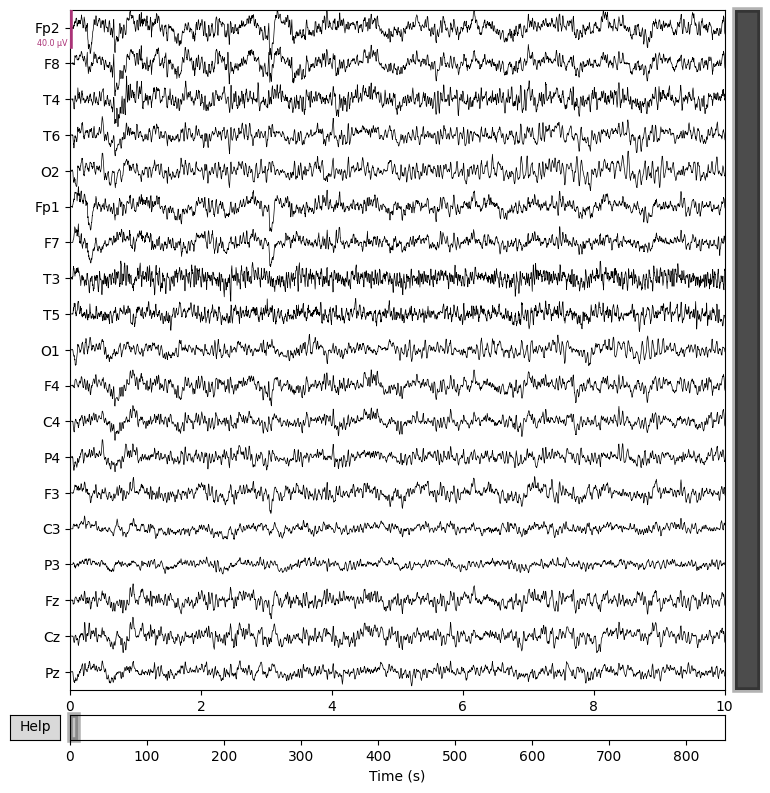

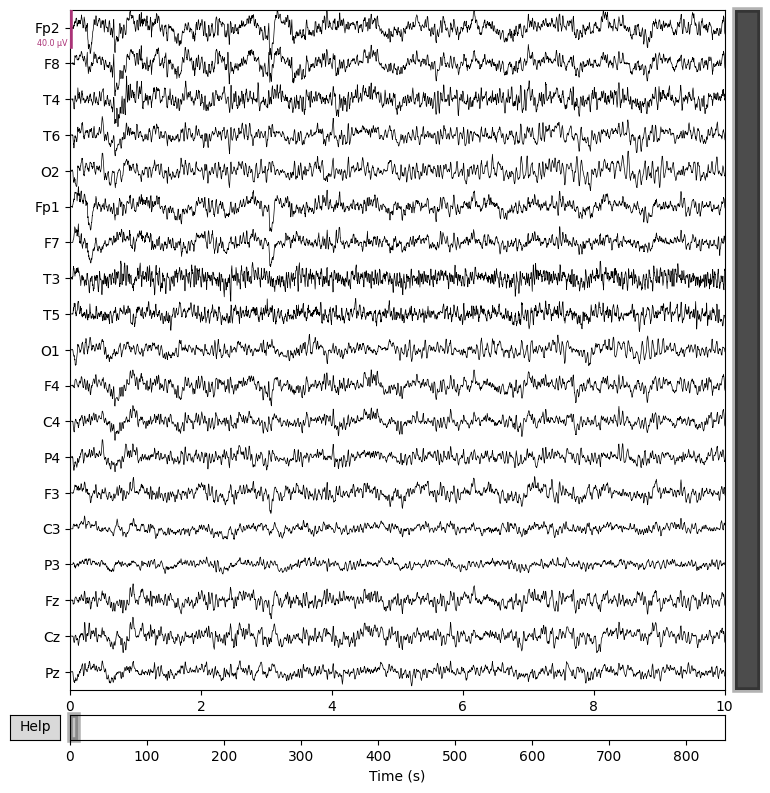

In [6]:
import mne

# Load the EDF file
file_path = "/kaggle/input/datverse/s10.edf"
raw = mne.io.read_raw_edf(file_path, preload=True)

# Basic information
print(raw.info)  # Display metadata
print(raw.ch_names)  # List channel names

# Access data
data, times = raw[:]
print(data)  # The signal data
print(times)  # Time information

# Plot the data (optional)
raw.plot()

In [7]:
def read_data(file_path):
    data=mne.io.read_raw_edf(file_path,preload=True)
    data.set_eeg_reference()
    data.filter(l_freq=0.5,h_freq=45)
    epochs=mne.make_fixed_length_epochs(data,duration=25,overlap=0)
    array=epochs.get_data()
    return array #trials,channel,length

In [8]:
sample_data=read_data(healthy_file_path[0])

Extracting EDF parameters from /kaggle/input/datverse/h09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 226249  =      0.000 ...   904.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data fro

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


In [9]:
sample_data.shape

(36, 19, 6250)

In [10]:
%%capture
control_epochs_array=[read_data(subject) for subject in healthy_file_path]
patients_epochs_array=[read_data(subject) for subject in patient_file_path]

In [11]:
control_epochs_labels=[len(i)*[0] for i in control_epochs_array]
patients_epochs_labels=[len(i)*[1] for i in patients_epochs_array]
print(len(control_epochs_labels),len(patients_epochs_labels))

14 14


In [12]:
epochs_array=control_epochs_array+patients_epochs_array
epochs_labels=control_epochs_labels+patients_epochs_labels
print(len(epochs_array),len(epochs_labels))

28 28


In [13]:
groups=[[i]*len(j) for i, j in enumerate(epochs_array)]
len(groups)

28

In [14]:
epochs_array = np.vstack(epochs_array)  # Assuming epochs_array contains arrays that can be stacked vertically
epochs_labels = np.hstack(epochs_labels)  # Convert to NumPy array
groups_array = np.hstack(groups)  # Convert to NumPy array

# Now you can safely check the shapes
#no. of segments,no. of channels,length of signal
print(epochs_array.shape, epochs_labels.shape, groups_array.shape)

(1142, 19, 6250) (1142,) (1142,)


In [15]:
print(epochs_array.shape,epochs_labels.shape,groups_array.shape)

(1142, 19, 6250) (1142,) (1142,)


In [16]:
from tqdm import tqdm  
from scipy import stats  

def mean(data):
    return np.mean(data, axis=-1)

def std(data):
    return np.std(data, axis=-1)

def ptp(data):
    return np.ptp(data, axis=-1)

def var(data):
    return np.var(data, axis=-1)

def minim(data):
    return np.min(data, axis=-1)

def maxim(data):
    return np.max(data, axis=-1)
def argminim(data):
    return np.argmin(data, axis=-1)

def argmaxim(data):
    return np.argmax(data, axis=-1)

def mean_square(data):
    return np.mean(data ** 2, axis=-1)

def rms(data):
    return np.sqrt(np.mean(data ** 2, axis=-1))

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data, axis=-1)), axis=-1)

def skewness(data):
    return stats.skew(data, axis=-1)

def kurtosis(data):
    return stats.kurtosis(data, axis=-1)
# Function to concatenate features for each channel
def concatenate_features(data):
    # Stack each feature along the last axis for each channel
    return np.stack((
        mean(data),
        std(data),
        ptp(data),
        var(data),
        minim(data),
        maxim(data),
        argminim(data),
        argmaxim(data),
        mean_square(data),
        rms(data),
        abs_diffs_signal(data),
        skewness(data),
        kurtosis(data)
    ), axis=-1)

# Generate features array with the correct shape (1142, 19, 13)
features = []
for data in tqdm(epochs_array):  
    features.append(concatenate_features(data))

features = np.array(features)  
print(features.shape)  


100%|██████████| 1142/1142 [00:07<00:00, 143.42it/s]

(1142, 19, 13)


In [20]:
# Step 1: Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer

# Step 2: Reshape features to reduce dimensions to (samples, 13 features) by averaging across channels
# features has shape (1142, 19, 13), so we take the mean across the 19 channels
features_reduced = np.mean(features, axis=1)

# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_reduced, epochs_labels, test_size=0.3, random_state=42)

# Step 4: Train an SVM model
svm_model = SVC(probability=True, kernel='rbf', random_state=42)  # Use RBF kernel for non-linear classification
svm_model.fit(X_train, y_train)

# Step 5: Predict and evaluate the model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy:.2f}")

# Step 6: Set up LIME Tabular Explainer
feature_names = ["mean", "std", "ptp", "var", "minim", "maxim", "argminim", "argmaxim",
                 "mean_square", "rms", "abs_diffs_signal", "skewness", "kurtosis"]

explainer = LimeTabularExplainer(X_train, mode="classification", feature_names=feature_names,
                                 class_names=["Control", "Patient"], discretize_continuous=True)

# Step 7: Explain a specific prediction
i = 0  # Index of the test sample to explain
sample = X_test[i].reshape(1, -1)
sample_label = y_test[i]

# Generate the explanation
explanation = explainer.explain_instance(sample[0], svm_model.predict_proba, num_features=13)

# Step 8: Visualize the explanation
explanation.show_in_notebook(show_table=True)


SVM Model Accuracy: 0.53


In [24]:
!pip install shap

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  0%|          | 0/50 [00:00<?, ?it/s]

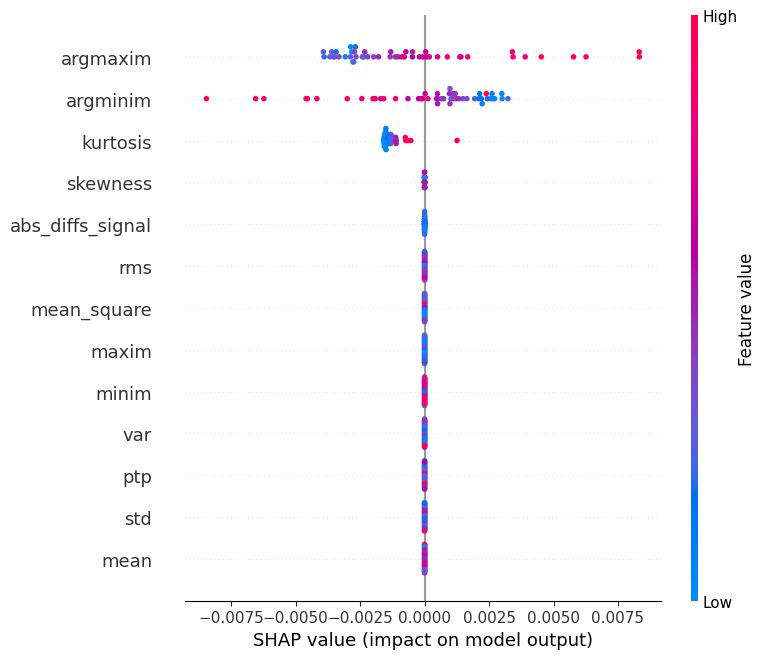

In [26]:


import shap
import matplotlib.pyplot as plt

# Step 1: Wrap the SVM model using a callable function for SHAP
def svm_predict_proba(X):
    return svm_model.predict_proba(X)

# Step 2: Create a SHAP Kernel Explainer
# SHAP Kernel Explainer is model-agnostic and works for any black-box model
explainer = shap.KernelExplainer(svm_predict_proba, X_train[:100])  # Use a subset of training data for speed

# Step 3: Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test[:50])  # Explain predictions for a subset of test data

# Step 4: Visualize SHAP values
# Summary plot to visualize global feature importance
shap.summary_plot(shap_values[1], X_test[:50], feature_names=feature_names)

# Step 5: Explain a single prediction
# Visualize local explanations for a specific test sample
sample_index = 0
shap.force_plot(
    explainer.expected_value[1], 
    shap_values[1][sample_index], 
    X_test[sample_index],
    feature_names=feature_names
)
